# Coursework Code

## B. Consider Bayesian analysis of the illustrative polynomial interpolation problem in PRML §1.1. using Evidence Approximation method discussed in PRML §3.5.1.

### 1. Generate a dataset similar to this illustration and solve the regression problem with various orders of polynomials. You should have a training dataset and a separate testing dataset. What is the variation in the test set prediction error taken over different realizations of the data? Quantify this by means of boxplots at different model orders.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split

In [31]:
n = 300

rn = np.random.uniform(-2, 2, n)
x_clean = np.reshape(np.sort(rn, axis=0), (n, 1))

def f(x):
    return math.sin(math.pi*x)

In [32]:
x = x_clean
f2 = np.vectorize(f)
y_clean = f2(x)
y = y_clean #+ noise(0,0.1)

Shape X Train:(270, 1) Test:(30, 1)
Shape y Train:(270, 1) Test:(30, 1)
Shape X Train:(270, 1) Test:(30, 1)
Shape y Train:(270, 1) Test:(30, 1)


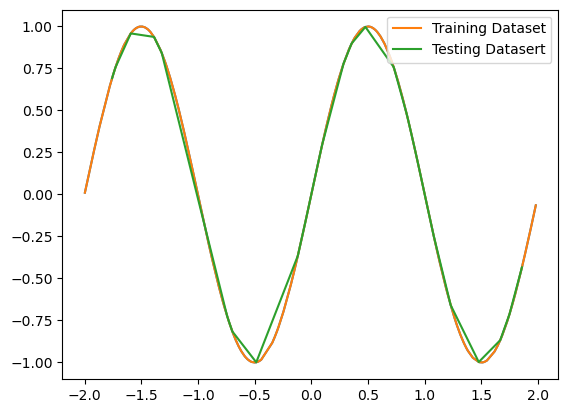

In [33]:
x_train_2, x_test_2, y_train, y_test = train_test_split(x,y,test_size=0.1)

print('Shape X Train:'+str(x_train_2.shape)+" Test:"+str(x_test_2.shape))
print('Shape y Train:'+str(y_train.shape)+" Test:"+str(y_test.shape))
x_train = np.reshape(np.sort(x_train_2, axis=0), (len(x_train_2), 1))
x_test = np.reshape(np.sort(x_test_2, axis=0), (len(x_test_2), 1))

y_train = f2(x_train)
y_test = f2(x_test)

print('Shape X Train:'+str(x_train.shape)+" Test:"+str(x_test.shape))
print('Shape y Train:'+str(y_train.shape)+" Test:"+str(y_test.shape))


plt.plot(x,y)
plt.plot(x_train, y_train, label="Training Dataset")
plt.plot(x_test, y_test, label="Testing Datasert")
plt.legend()
plt.savefig("fig/traintestsplit.png")

In [34]:
def make_design(x, basisfn, basisfn_locs=None): 
    if basisfn_locs is None:
        return np.concatenate([np.ones(x.shape), basisfn(x)], axis=1)
    else:
        return np.concatenate([np.ones(x.shape)] + [basisfn(x, loc) for loc in basisfn_locs], axis=1)

def polynomial_basis_fn(x, degree):
    return x ** degree

def calculate_w_poly(x, y, lam, p):
    locs = []
    for i in range(1,p+1):
        locs.append(i)
    
    design = make_design(x, polynomial_basis_fn, locs)

    w = (np.linalg.inv(design.T @ design + lam * np.identity(p+1)) @ (design.T @ y))
    return w

def polynomial_regression(x_test, x_train, y_train, lam, p):
    w = calculate_w_poly(x_train,y_train,lam,p)

    t = []
    for xVal in x_test:
        targ = 0
        targ = targ + w[0]
        for i in range(1,len(w)):
            targ = targ + w[i]*polynomial_basis_fn(xVal,i)
        t.append(targ)
    return t

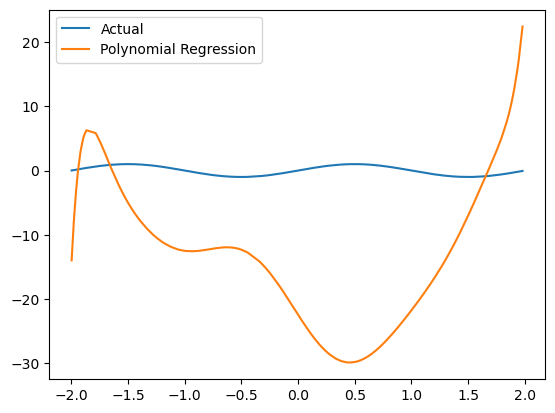

In [46]:
t = polynomial_regression(x_train, x_test, y_test,0,25)


plt.plot(x_train, y_train, label="Actual")
plt.plot(x_train, t, label="Polynomial Regression")
plt.legend()

In [36]:
t_array = []

for i in range(0,15):
    t_array.append(polynomial_regression(x_train, x_test, y_test, 0, i))

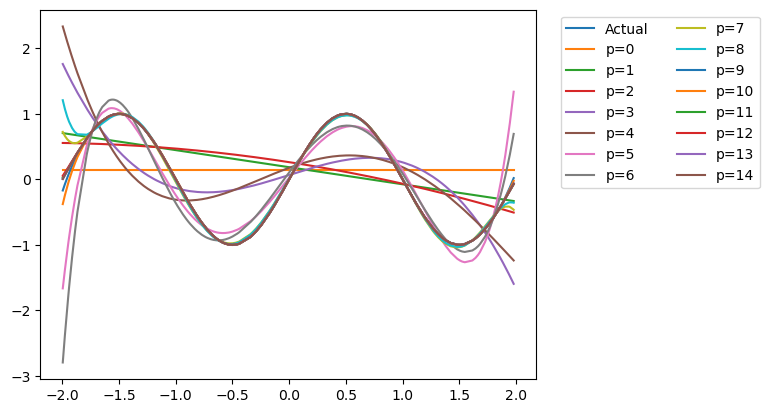

In [37]:
plt.plot(x_train, y_train, label="Actual")
for i in range(0,25):
    plt.plot(x_train, t_array[i], label="p="+str(i))
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 1), ncol=2)
plt.savefig("fig/pvalueplots.png")

In [38]:
def error(y,t):
    error = 0
    for i in range(0,len(t)):
        error = error + (t[i]-y[i])**2
    return error

def erms(y,t,N):
    return math.sqrt((2*error(y,t))/N)

In [39]:
error_value = []
error_labels = []
for i in range(0,15):
    error_value.append(y_train-t_array[i])
    error_labels.append(0)

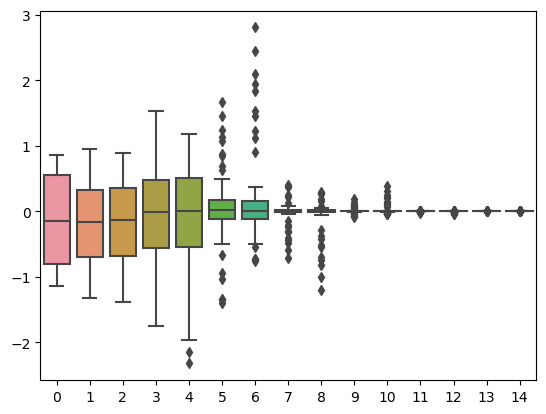

In [40]:
import seaborn as sns

plot = sns.boxplot(data=error_value)

fig = plot.get_figure()

fig.savefig("fig/boxplot.png")


### 2. Implement a regularized regression for a high order polynomial (say 9) at various values of the regularization hyperparameter λ.

### 3. Compute the Bayesian evidence formula of §3.5.1 for this problem at various values of α and β taken over a regular grid on two dimensions. Illustrate the results by means of contour plot.

In [41]:
def bayesian_evidence_function(t, a, b):
    log_evidence_func = (M/2)*math.log(a) + (N/2)*math.log(b) - E(m) - 0.5*math.log(A) - (N/2)*math.log(2*math.pi)

### 4. By inspecting the above find the values of α and β for which the evidence p(t|α, β) is maximum.

### 5. How close are these values to the solutions derived in Eqn. 3.92 and 3.95? How close is their ratio to the best λ obtained in (ii) above?